In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset_1 = pd.read_csv('amazon_cells_labelled.txt' , sep='\t' , header=None)

In [3]:
dataset_1.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
column_names = ['review' , 'label']

In [5]:
dataset_1.columns = column_names

In [6]:
dataset_1.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [7]:
dataset_2 = pd.read_csv('imdb_labelled.txt' , sep ='\t' , header=None)

In [8]:
dataset_2.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [9]:
dataset_2.columns = column_names

In [10]:
dataset_2.head()

,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
dataset_3 = pd.read_csv('yelp_labelled.txt' , sep='\t' , header=None)

In [12]:
dataset_3.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
dataset_3.columns = column_names

In [14]:
dataset_3.head()

,review,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [20]:
dataset = dataset_1.append([dataset_2 , dataset_3] , ignore_index=True)

In [21]:
dataset

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [22]:
dataset.shape

(2748, 2)

In [23]:
pd.value_counts(dataset['label'])

1    1386
0    1362
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


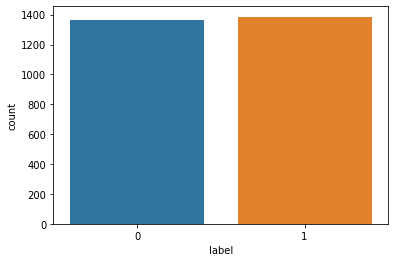

In [24]:
sns.countplot(dataset['label'])

In [25]:
dataset.isna().sum()

review    0
label     0
dtype: int64

In [27]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [28]:
import string
punct = string.punctuation

In [29]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)

In [31]:
stopwords

['how',
 'their',
 'top',
 'so',
 'though',
 'if',
 'we',
 'everywhere',
 'hereby',
 'might',
 'own',
 'part',
 'all',
 'during',
 'elsewhere',
 'am',
 'under',
 'herein',
 'himself',
 'everyone',
 'three',
 'which',
 'together',
 'name',
 'other',
 'none',
 "'ll",
 'almost',
 'eight',
 'neither',
 'were',
 'n‘t',
 'me',
 'whole',
 'anywhere',
 'say',
 'thru',
 'much',
 'would',
 'with',
 'he',
 'except',
 'there',
 'thereby',
 'move',
 'off',
 'please',
 'regarding',
 'our',
 'back',
 'here',
 'whose',
 'your',
 'more',
 'another',
 'therefore',
 'just',
 'may',
 'last',
 'after',
 'through',
 'hereupon',
 'the',
 'than',
 'give',
 'becomes',
 'very',
 'made',
 'why',
 '’ll',
 'put',
 'nor',
 'hence',
 'sixty',
 'seem',
 'rather',
 'cannot',
 'sometimes',
 'enough',
 'been',
 'do',
 'beforehand',
 'down',
 'over',
 'thereafter',
 'whoever',
 'any',
 'always',
 'are',
 'due',
 'still',
 'third',
 'whereby',
 'yourselves',
 'have',
 'has',
 'behind',
 'doing',
 'various',
 'most',
 'for

In [32]:
len(stopwords)

326

In [33]:
def clean_data(text):
  doc = nlp(text)

  tokens = []
  for token in doc:
    if token.lemma_ != '-PRON-':
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lemma_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)

  return cleaned_tokens


In [34]:
X = dataset.iloc[: , 0].values
y= dataset.iloc[: , 1].values

In [35]:
X[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [36]:
y[0]

0

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer = clean_data)
X = vectorizer.fit_transform(X).toarray()

In [38]:
X.shape

(2748, 4202)

In [39]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y ,test_size = 0.25 , random_state = 0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200 )
classifier.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred = classifier.predict(x_test)

In [42]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,

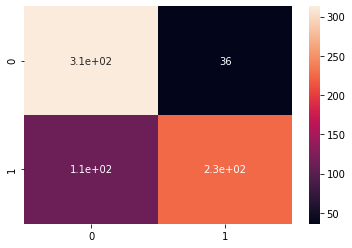

In [43]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm ,annot=True)

In [44]:
accuracy_score(y_test , y_pred)

0.784570596797671

In [ ]:
#THANK YOU!!